## テクスチャ特徴量抽出

In [1]:
import os, sys
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from texture_extractor import TextureExtractor

import logging
logger = logging.getLogger("radiomics")
logger.setLevel(logging.ERROR)
logger = logging.getLogger("radiomics.glcm")
logger.setLevel(logging.ERROR)

# データシートにて，データパスが書かれているカラムを設定
PATH_COLUMNS = "path"

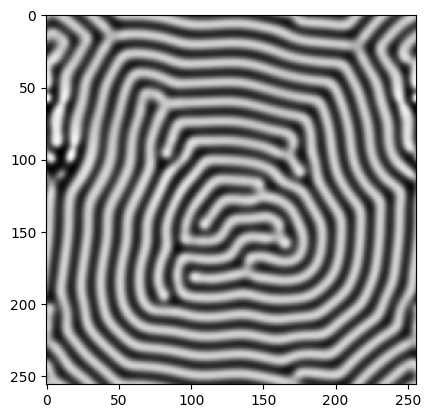

In [8]:
path = "images/gs_2511_5500.tiff"
image = np.array( Image.open(path).convert('L') )
image_array = np.array(image)
plt.imshow(image_array, cmap="binary")

### テクスチャ特徴量の取得

In [12]:
texture_extractor = TextureExtractor(clip_size=64, num_sample=50)
result = texture_extractor.get_median_texture_feature_from_patch(image_array)
pd.DataFrame(result, index=[path])

,FO-10Percentile,FO-90Percentile,FO-Energy,FO-Entropy,FO-InterquartileRange,FO-Kurtosis,FO-Maximum,FO-MeanAbsoluteDeviation,FO-Mean,FO-Median,...,GLDM-GrayLevelNonUniformity,GLDM-GrayLevelVariance,GLDM-HighGrayLevelEmphasis,GLDM-LargeDependenceEmphasis,GLDM-LargeDependenceHighGrayLevelEmphasis,GLDM-LargeDependenceLowGrayLevelEmphasis,GLDM-LowGrayLevelEmphasis,GLDM-SmallDependenceEmphasis,GLDM-SmallDependenceHighGrayLevelEmphasis,GLDM-SmallDependenceLowGrayLevelEmphasis
images/gs_2511_5500.tiff,79.75,174.0,71627189.0,3.457804,72.0,1.51206,190.5,32.371561,127.269409,128.0,...,403.835938,13.06048,65.507324,14.761475,1161.194702,1.074406,0.058392,0.192619,10.924759,0.007932


### データシートの読み込み

In [34]:
dataseet = pd.read_csv("./sc_data_seet.csv", index_col=PATH_COLUMNS)
dataseet.head()

,f,k
path,,
images/gs_2700_5500.tiff,0.02700,0.055
images/gs_2352_5500.tiff,0.02352,0.055
images/gs_2865_5500.tiff,0.02865,0.055
images/gs_2016_5500.tiff,0.02016,0.055
images/gs_2511_5500.tiff,0.02511,0.055


### テクスチャ抽出インスタンス作成

In [35]:
setting = {
    "binWidth" : 25,
}
texture_extractor = TextureExtractor(setting=setting)

### テクスチャ抽出の実行

In [36]:
df = pd.DataFrame()
for index, row in dataseet.iterrows():
    image = np.array( Image.open(index).convert('L') )
    image_array = np.array(image)
    mask_array = np.ones(image_array.shape)
    result = texture_extractor.get_texture_feature(image_array, mask_array)
    df = pd.concat([df, pd.DataFrame(result, index=[index])])
    
print(df.shape)
df.head()

(30, 93)


,FO-10Percentile,FO-90Percentile,FO-Energy,FO-Entropy,FO-InterquartileRange,FO-Kurtosis,FO-Maximum,FO-MeanAbsoluteDeviation,FO-Mean,FO-Median,...,GLDM-GrayLevelNonUniformity,GLDM-GrayLevelVariance,GLDM-HighGrayLevelEmphasis,GLDM-LargeDependenceEmphasis,GLDM-LargeDependenceHighGrayLevelEmphasis,GLDM-LargeDependenceLowGrayLevelEmphasis,GLDM-LowGrayLevelEmphasis,GLDM-SmallDependenceEmphasis,GLDM-SmallDependenceHighGrayLevelEmphasis,GLDM-SmallDependenceLowGrayLevelEmphasis
images/gs_2700_5500.tiff,80.0,168.0,1.052519e+09,2.049164,67.0,1.522951,185.0,30.242184,122.210449,119.0,...,17233.888977,1.657946,13.446045,41.562653,527.028015,6.426540,0.131398,0.041888,0.582785,0.004591
images/gs_2352_5500.tiff,82.0,184.0,1.302279e+09,2.540300,70.0,1.757117,222.0,33.882882,135.608383,139.0,...,11993.420715,2.466637,18.078156,34.740387,681.125763,5.074764,0.135526,0.047299,0.772729,0.005822
images/gs_2865_5500.tiff,84.0,162.0,9.269245e+08,1.982162,51.0,2.015939,189.0,25.867374,115.155777,106.0,...,18893.164276,1.444356,11.233932,43.314911,415.160843,7.799137,0.149927,0.034992,0.447770,0.004288
images/gs_2016_5500.tiff,85.0,210.0,1.729606e+09,2.793457,71.0,2.160657,243.0,38.617567,155.876160,165.0,...,10404.946899,3.439311,36.528137,35.857483,1520.027832,1.721780,0.050987,0.052151,1.552047,0.002785
images/gs_2511_5500.tiff,80.0,174.0,1.149166e+09,2.281862,72.0,1.526665,202.0,32.400909,127.447327,128.0,...,14778.194122,2.007081,23.545456,36.002777,792.861038,2.613772,0.063135,0.048760,1.168110,0.002719


### パッチの特徴量の中央値を取得

In [37]:
texture_extractor = TextureExtractor(clip_size=64, num_sample=50)

In [38]:
df = pd.DataFrame()
for index, row in dataseet.iterrows():
    image = np.array( Image.open(index).convert('L') )
    image_array = np.array(image)
    result = texture_extractor.get_median_texture_feature_from_patch(image_array)
    df = pd.concat([df, pd.DataFrame(result, index=[index])])

print(df.shape)
df.head()

(30, 93)


,FO-10Percentile,FO-90Percentile,FO-Energy,FO-Entropy,FO-InterquartileRange,FO-Kurtosis,FO-Maximum,FO-MeanAbsoluteDeviation,FO-Mean,FO-Median,...,GLDM-GrayLevelNonUniformity,GLDM-GrayLevelVariance,GLDM-HighGrayLevelEmphasis,GLDM-LargeDependenceEmphasis,GLDM-LargeDependenceHighGrayLevelEmphasis,GLDM-LargeDependenceLowGrayLevelEmphasis,GLDM-LowGrayLevelEmphasis,GLDM-SmallDependenceEmphasis,GLDM-SmallDependenceHighGrayLevelEmphasis,GLDM-SmallDependenceLowGrayLevelEmphasis
images/gs_2700_5500.tiff,80.0,168.0,65906466.5,3.401861,66.000,1.524770,182.0,30.163479,122.347046,120.00,...,412.387451,11.341115,44.616333,14.412354,742.598145,3.625428,0.163484,0.212875,8.704644,0.015490
images/gs_2352_5500.tiff,81.0,183.5,80261725.5,3.759305,73.500,1.689005,209.0,34.587022,134.581421,138.00,...,326.529297,15.230360,90.151489,14.979492,1523.294678,0.928715,0.043685,0.235685,18.472024,0.006477
images/gs_2865_5500.tiff,84.0,162.0,57648243.0,3.224102,49.000,2.104036,186.0,25.466753,114.847046,105.00,...,524.550293,8.731640,34.161255,19.054199,463.959106,3.650179,0.119179,0.165387,6.629853,0.009771
images/gs_2016_5500.tiff,85.5,207.0,107090671.0,4.009183,68.625,2.159584,230.0,38.156086,154.976074,165.00,...,273.126465,20.437174,148.377563,15.779297,3084.223755,0.436241,0.024760,0.223952,25.131514,0.004419
images/gs_2511_5500.tiff,81.0,174.0,72215671.0,3.437688,71.000,1.505763,190.0,32.059105,128.080933,128.75,...,414.035156,12.739828,64.592651,15.318604,1127.902466,1.155870,0.059416,0.219963,10.983841,0.008704


### テクスチャ特徴量と特性をマージしたデータフレーム作成

In [39]:
df = pd.merge(dataseet, df, left_index=True, right_index=True)

In [40]:
df.head()

,f,k,FO-10Percentile,FO-90Percentile,FO-Energy,FO-Entropy,FO-InterquartileRange,FO-Kurtosis,FO-Maximum,FO-MeanAbsoluteDeviation,...,GLDM-GrayLevelNonUniformity,GLDM-GrayLevelVariance,GLDM-HighGrayLevelEmphasis,GLDM-LargeDependenceEmphasis,GLDM-LargeDependenceHighGrayLevelEmphasis,GLDM-LargeDependenceLowGrayLevelEmphasis,GLDM-LowGrayLevelEmphasis,GLDM-SmallDependenceEmphasis,GLDM-SmallDependenceHighGrayLevelEmphasis,GLDM-SmallDependenceLowGrayLevelEmphasis
images/gs_2700_5500.tiff,0.02700,0.055,80.0,168.0,65906466.5,3.401861,66.000,1.524770,182.0,30.163479,...,412.387451,11.341115,44.616333,14.412354,742.598145,3.625428,0.163484,0.212875,8.704644,0.015490
images/gs_2352_5500.tiff,0.02352,0.055,81.0,183.5,80261725.5,3.759305,73.500,1.689005,209.0,34.587022,...,326.529297,15.230360,90.151489,14.979492,1523.294678,0.928715,0.043685,0.235685,18.472024,0.006477
images/gs_2865_5500.tiff,0.02865,0.055,84.0,162.0,57648243.0,3.224102,49.000,2.104036,186.0,25.466753,...,524.550293,8.731640,34.161255,19.054199,463.959106,3.650179,0.119179,0.165387,6.629853,0.009771
images/gs_2016_5500.tiff,0.02016,0.055,85.5,207.0,107090671.0,4.009183,68.625,2.159584,230.0,38.156086,...,273.126465,20.437174,148.377563,15.779297,3084.223755,0.436241,0.024760,0.223952,25.131514,0.004419
images/gs_2511_5500.tiff,0.02511,0.055,81.0,174.0,72215671.0,3.437688,71.000,1.505763,190.0,32.059105,...,414.035156,12.739828,64.592651,15.318604,1127.902466,1.155870,0.059416,0.219963,10.983841,0.008704


In [30]:
texture_extractor.feature_class_func.keys()

dict_keys(['FO', 'GLCM', 'GLSZM', 'GLRLM', 'NGTDM', 'GLDM'])

In [31]:
target_key = "GLCM"
target_columns = list(filter(lambda item: target_key in item, df.columns))
df[target_columns].head()

,GLCM-Autocorrelation,GLCM-ClusterProminence,GLCM-ClusterShade,GLCM-ClusterTendency,GLCM-Contrast,GLCM-Correlation,GLCM-DifferenceAverage,GLCM-DifferenceEntropy,GLCM-DifferenceVariance,GLCM-Id,...,GLCM-Imc2,GLCM-InverseVariance,GLCM-JointAverage,GLCM-JointEnergy,GLCM-JointEntropy,GLCM-MCC,GLCM-MaximumProbability,GLCM-SumAverage,GLCM-SumEntropy,GLCM-SumSquares
images/gs_2700_5500.tiff,43.391838,2926.107780,32.190529,43.371396,1.983937,0.912603,1.068774,1.753854,0.770061,0.596147,...,0.961744,0.462757,5.743784,0.029549,5.469471,0.913119,0.070745,11.487569,4.317731,11.339284
images/gs_2352_5500.tiff,87.930086,5820.502058,-38.981894,57.866376,2.261275,0.923566,1.128085,1.759897,0.801984,0.589210,...,0.975889,0.447977,8.680000,0.022871,5.857230,0.924457,0.061399,17.360001,4.652084,15.036893
images/gs_2865_5500.tiff,33.213064,2371.504562,122.387037,33.374540,1.475501,0.915295,0.891267,1.626606,0.648194,0.642309,...,0.957254,0.469427,5.013950,0.045867,5.180061,0.916094,0.149045,10.027899,4.154300,8.701931
images/gs_2016_5500.tiff,143.265005,13187.810959,-295.975989,77.922163,2.362609,0.937672,1.134221,1.934277,1.063903,0.594347,...,0.978960,0.446573,11.143816,0.018101,6.332395,0.943034,0.055848,22.287631,4.969104,20.109567
images/gs_2511_5500.tiff,63.204624,3795.002635,-5.354269,49.997547,2.232659,0.914291,1.139647,1.714445,0.741054,0.586433,...,0.976205,0.427733,7.154259,0.036021,5.336382,0.914889,0.096765,14.308518,4.326271,13.046897


### 特徴量テーブルのダウンロード

In [32]:
df.to_csv("feature_table.csv")